# Master Thesis


## Imports

In [1]:
from utils import *
from network import *
from networkx.algorithms import bipartite
import community as community_louvain

from collections import Counter
import pandas as pd
import json
import math
from scipy import stats

%load_ext autoreload
%autoreload 2
net = Network()


In [28]:
def get_results(id,results,artist_label) : 
    artists_dict = dict()
    for row in results : 
        for art in row[artist_label] :
              
                if art['id'] == int(str(id)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    if len(art['role']) == 0 : 
                        artists_dict[art['name']].append("none")

                     #artists_dict[art['name']].append(row['year'])
                    for r in art['role']:
                          artists_dict[art['name']].append(r)
                   
                    break    

    return artists_dict

In [103]:
def get_role_dist_by_gender_detailed(ids,df,gender):
    role_dist_dict = dict()
    for id in ids :
        result = get_results(id)
        genres_dist = dict(Counter(list(result.values())[0]))
        for key, value in genres_dist.items():
       
            if key not in list(role_dist_dict.keys()):
                role_dist_dict[key] = 0 #female    
                
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == gender:
                role_dist_dict[key] += value
        
    return role_dist_dict


# Album networks

In [5]:
def get_results_bipartite_alb(id,results) : 
    artists_dict = dict()
  
    for row in results : 
        for art in row['artists'] :
                if art['id'] == int(str(id)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                    for r in art['role']:
                        artists_dict[art['name']].append(r)
                    break    
    return artists_dict

In [6]:
def get_details_by_centrality_alb(centrality,results) :
    idx = 1
    for n in centrality :
        result = get_results_bipartite_alb(n,results)
        print(idx,"-",list(result.keys())[0],"-",Counter(list(result.values())[0]))
        idx+=1

In [7]:
results_alb = None
with open('../data/albums/jazz/album_final_musician_only.json',encoding="UTF-8") as f:
        results_alb = json.load(f)   

## Bipartite Graph

In [250]:
bipartite_jazz_net = net.build_bipartite_network(results_alb,'title','artists','year','genres')

In [92]:
bip_degree_centralities = net.get_bipartite_degree_centrality(bipartite_jazz_net)[0]

### Top musicians before 2000

In [85]:
get_details_by_centrality_alb(bip_degree_centralities[:20],results_alb)

1 - herbie hancock - Counter({'piano': 93, 'main artist': 30, 'keyboards': 7, 'organ': 3, 'synthesizer': 2, 'backing vocals': 2, 'vocals': 2, 'performer': 1, 'mellotron': 1, 'percussion': 1, 'soloist': 1, 'harp': 1, 'drum programming': 1, 'clavinet': 1, 'guest': 1, 'featuring': 1, 'drum machine': 1})
2 - elvin jones - Counter({'drums': 73, 'main artist': 13, 'percussion': 2, 'strings': 1, 'timpani': 1})
3 - jack dejohnette - Counter({'drums': 73, 'main artist': 18, 'piano': 5, 'percussion': 4, 'melodica': 2, 'keyboards': 2, 'congas': 2, 'synth': 1, 'voice': 1, 'tom tom': 1, 'timpani': 1, 'organ': 1, 'vocals': 1, 'kalimba': 1, 'performer': 1})
4 - freddie hubbard - Counter({'trumpet': 60, 'main artist': 19, 'flugelhorn': 13, 'cornet': 1, 'read': 1})
5 - mccoy tyner - Counter({'piano': 64, 'main artist': 23})
6 - art taylor - Counter({'drums': 64, 'main artist': 3})
7 - chick corea - Counter({'piano': 51, 'main artist': 28, 'synthesizer': 7, 'percussion': 6, 'keyboards': 5, 'marimba': 4,

 ### Top musicians after 2000

In [93]:
get_details_by_centrality_alb(bip_degree_centralities[:20],results_alb)

1 - mats gustafsson - Counter({'saxophone': 25, 'organ': 3, 'piano': 3, 'flute': 2, 'score': 1, 'main artist': 1, 'reeds': 1})
2 - john zorn - Counter({'main artist': 53, 'saxophone': 23, 'vocals': 6, 'voice': 1, 'piano': 1})
3 - brad mehldau - Counter({'piano': 23, 'main artist': 16, 'orchestrated': 1})
4 - bill frisell - Counter({'guitar': 52, 'main artist': 25, 'loops': 3, 'banjo': 3, 'ukulele': 2, 'balalaika': 1, 'synthesizer': 1, 'clarinet': 1})
5 - mary halvorson - Counter({'guitar': 21, 'main artist': 6, 'soloist': 2})
6 - kenny wollesen - Counter({'vibraphone': 19, 'drums': 13, 'percussion': 6, 'chimes': 3, 'bells': 2, 'vocals': 1, 'glockenspiel': 1, 'marimba': 1, 'cymbal': 1, 'timpani': 1})
7 - pat metheny - Counter({'guitar': 40, 'main artist': 25, 'synthesizer': 2, 'piano': 1, 'other': 1, 'percussion': 1, 'bandoneon': 1, 'sitar': 1, 'flugelhorn': 1})
8 - shabaka hutchings - Counter({'clarinet': 8, 'saxophone': 4, 'woodwind': 2, 'shakuhachi': 1, 'band': 1})
9 - jeff parker - 

## jazz Album projection network 

In [64]:
albums = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type'] == 'Album']
jazz_album_projection_network = bipartite.weighted_projected_graph(bipartite_jazz_net, albums)
#jazz_album_projection_network = net.build_album_projection_network(albums,'title','artists','year')
net.get_network_info(jazz_album_projection_network)

nb nodes:  4741
nb edges:  105220
Min node degree:  0
Max node degree:  520
Avg node degree:  44.38726007171483


In [65]:
net.save_graph(jazz_album_projection_network,"../networks/gephi/album/jazz_album_projection_network.gexf")

In [7]:
largest_cc = max(nx.connected_components(jazz_album_projection_network), key=len)
largest_cc = jazz_album_projection_network.subgraph(largest_cc)
#net.get_avg_path_length(largest_cc)

In [8]:
net.get_diameter(largest_cc)
net.get_density(jazz_album_projection_network)
net.get_nb_of_connected_comp(jazz_album_projection_network)
#net.get_avg_weighted_degree(jazz_album_projection_network)
net.get_avg_clustering_coefficent(jazz_album_projection_network)

Diameter :  12
Density :  0.009510714060040032
Nb connected components :  406
Average clustering coefficient :  0.5465206803013358


### clustering coefficient

In [22]:
nb_solo = 0
for r in results : 
    if len(r['artists']) <= 3 :
        nb_solo+=1
nb_solo        

337

69


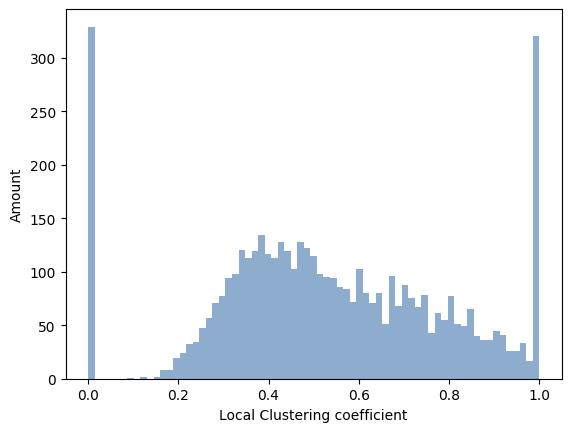

In [16]:
net.plot_hist_clustering_coeff_by_amount(jazz_album_projection_network)

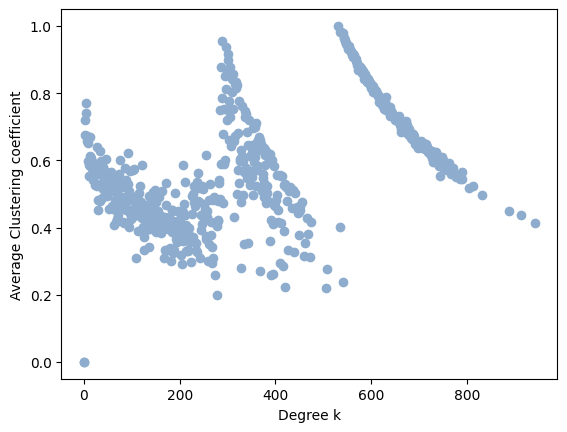

In [23]:
net.plot_clustering_coeff_by_degree(jazz_album_projection_network)

## Jazz collaborators network 

In [251]:
collaborators = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type']=='Artist']
collaborators_projection_network = bipartite.weighted_projected_graph(bipartite_jazz_net, collaborators) 
net.get_network_info(collaborators_projection_network) 

nb nodes:  5050
nb edges:  51784
Min node degree:  0
Max node degree:  209
Avg node degree:  20.50851485148515


In [198]:
net.save_graph(collaborators_projection_network,"../networks/gephi/album/jazz_collaborators_projection.gexf")

In [11]:
largest_cc = max(nx.connected_components(collaborators_projection_network), key=len)
largest_cc = collaborators_projection_network.subgraph(largest_cc)
#net.get_network_info(collaborators_projection_network)      
net.get_diameter(largest_cc)
net.get_density(collaborators_projection_network)
net.get_nb_of_connected_comp(collaborators_projection_network)
#net.get_avg_weighted_degree(collaborators_projection_network)
net.get_avg_clustering_coefficent(collaborators_projection_network)
#net.get_avg_path_length(largest_cc)

Diameter :  13
Density :  0.001789112623307808
Nb connected components :  406
Average clustering coefficient :  0.8433185075133779


###  Gender distibution before/after year 2000

In [122]:
def get_results_gender_dist(id,results,artist_label) : 
    artists_dict = dict()
    for row in results : 
        for art in row[artist_label] :
              
                if art['id'] == int(str(id)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()

                    artists_dict[art['name']].append(row['year'])
                   
                    break    

    return artists_dict

In [123]:
def get_gender_dist(ids,df,results,artists):
    genders = [0,0,0]
    for id in ids :
        result = get_results_gender_dist(id,results,artists)
       
        genres_dist = dict(Counter(list(result.values())[0]))
       
        nb_repr = sum(genres_dist.values())
    
        current_gender = df[df["did"] == int(str(id)[3:])]["gender"].iloc[0]
   
        if current_gender == "male" :
            genders[0]+=nb_repr
        elif current_gender == "female":
            genders[1]+=nb_repr
        elif  current_gender == "other":
            genders[2]+=nb_repr
    
    return genders

In [124]:
df = pd.read_csv("../data/artists/album_musician_gender.csv")
degree_centralities = net.get_degree_centrality(collaborators_projection_network)[0]
genders = get_gender_dist(degree_centralities,df,results_alb,'artists')

In [126]:
genders

[13807, 1256, 2]

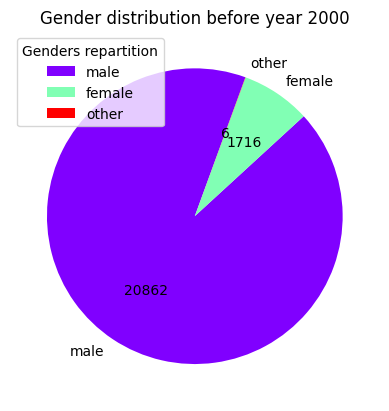

In [113]:
y =  pd.Series(genders,index= ["male", "female","other"])
mylabels = ["male", "female" ,"other"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct=lambda x: '{:.0f}'.format(x*y.sum()/100),colors=colors)
plt.legend(title = "Genders repartition",loc="upper left")
plt.title('Gender distribution before year 2000')
plt.savefig("../data/repartition/women/album/gender_bf_2000.png", format="png",transparent=True)
plt.show() 

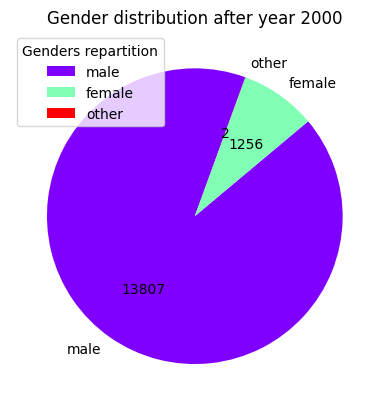

In [127]:
y =  pd.Series(genders,index= ["male", "female","other"])

mylabels = ["male", "female" ,"other"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct=lambda x: '{:.0f}'.format(x*y.sum()/100),colors=colors)
plt.legend(title = "Genders repartition",loc="upper left")
plt.title('Gender distribution after year 2000')
plt.savefig("../data/repartition/women/album/gender_af_2000.png", format="png",transparent=True)
plt.show() 

### Women roles before/after year 2000

In [213]:
def get_results_women_role(id,results,artist_label) : 
    artists_dict = dict()
    for row in results : 
        for art in row[artist_label] :
              
                if art['id'] == int(str(id)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    if len(art['role']) == 0 : 
                        artists_dict[art['name']].append("none")

                    for r in art['role']:
                          artists_dict[art['name']].append(r)
                    break    

    return artists_dict

In [236]:
def get_role_dist_female(ids,df,results,musician_label):
    role_dist_female_dict = dict()
    for id in ids :
        result = get_results_women_role(id,results,musician_label)
        genres_dist = dict(Counter(list(result.values())[0]))
        for key, value in genres_dist.items():
            current_role = key
            if "vocal" in key  :
                current_role = "vocal"
            elif  key != "none"  and "main artist" != key :
                current_role = "instrument" 
                
            current_gender = df[df["did"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == "female":
                if current_role not in list(role_dist_female_dict.keys()):
                    role_dist_female_dict[current_role] = 0 #female 
                role_dist_female_dict[current_role] += value
        
    return role_dist_female_dict

In [229]:
def get_role_dist_by_gender_detailed(ids,df,results,gender,musician_label):
    role_dist_dict = dict()
    for id in ids :
        result = get_results_women_role(id,results,musician_label)
        genres_dist = dict(Counter(list(result.values())[0]))
        for key, value in genres_dist.items():
       
            if key not in list(role_dist_dict.keys()):
                role_dist_dict[key] = 0 #female    
                
            current_gender = df[df["did"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == gender:
                role_dist_dict[key] += value
        
    return role_dist_dict

In [252]:
df = pd.read_csv("../data/artists/album_musician_gender.csv")
degree_centralities = net.get_degree_centrality(collaborators_projection_network)[0]
women_roles_dist = get_role_dist_female(degree_centralities,df,results_alb,'artists')


In [253]:
women_roles_dist

{'instrument': 1232, 'main artist': 247, 'vocal': 262}

In [254]:
del women_roles_dist['main artist']


In [256]:
df = pd.read_csv("../data/artists/album_musician_gender.csv")
women_roles_dist_all = get_role_dist_by_gender_detailed(degree_centralities,df,results_alb,'female','artists') 

In [258]:
temp_dict = women_roles_dist_all
del temp_dict['vocals']
del temp_dict['main artist']
#del temp_dict['none']
temp_dict = dict(sorted(temp_dict.items(), key=lambda item: item[1],reverse=True))
women_roles_dist_all_final = dict(list(temp_dict.items())[0:10])

####  Before  2000

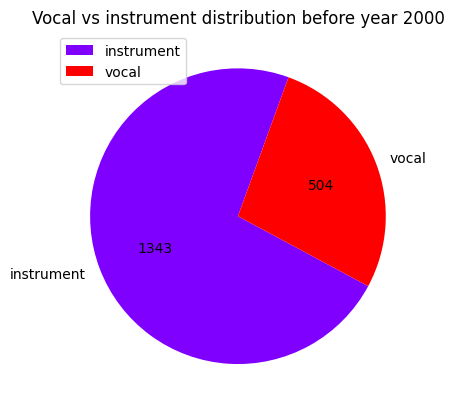

In [247]:
y = pd.Series(women_roles_dist)
mylabels = ["instrument","vocal"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct=lambda x: '{:.0f}'.format(x*y.sum()/100),colors=colors)
plt.legend(title = "",loc="upper left")
plt.title("Vocal vs instrument distribution before year 2000")
plt.savefig("../data/repartition/women/album/v_vs_i_bf_2000.png", format="png",transparent=True)
plt.show() 

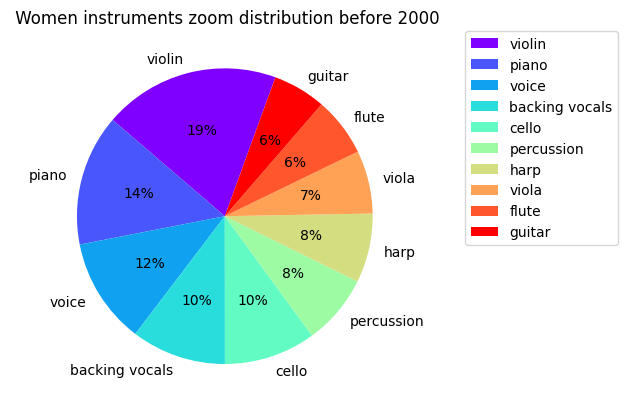

In [242]:
y = pd.Series(Counter(women_roles_dist_all_final))
mylabels = list(women_roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Women instruments zoom distribution before 2000")
plt.savefig("../data/repartition/women/album/instrument_zoom_dist_bf_2000.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

#### After 2000

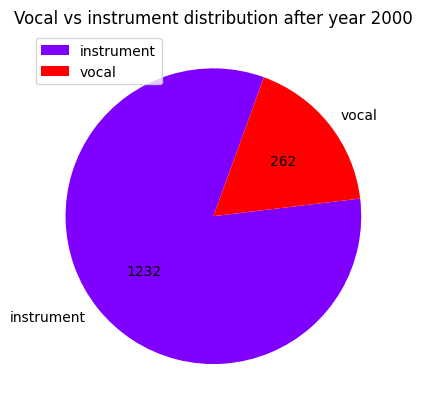

In [255]:
y = pd.Series(women_roles_dist)
mylabels = ["instrument","vocal"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct=lambda x: '{:.0f}'.format(x*y.sum()/100),colors=colors)
plt.legend(title = "",loc="upper left")
plt.title("Vocal vs instrument distribution after year 2000")
plt.savefig("../data/repartition/women/album/v_vs_i_af_2000.png", format="png",transparent=True)
plt.show() 

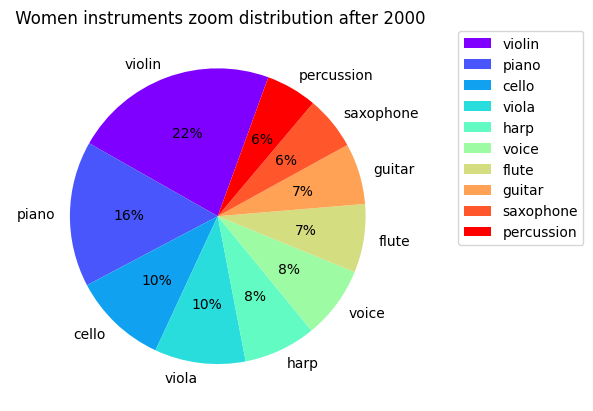

In [259]:
y = pd.Series(Counter(women_roles_dist_all_final))
mylabels = list(women_roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Women instruments zoom distribution after 2000")
plt.savefig("../data/repartition/women/album/instrument_zoom_dist_af_2000.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

### Local Clustering coefficient

153


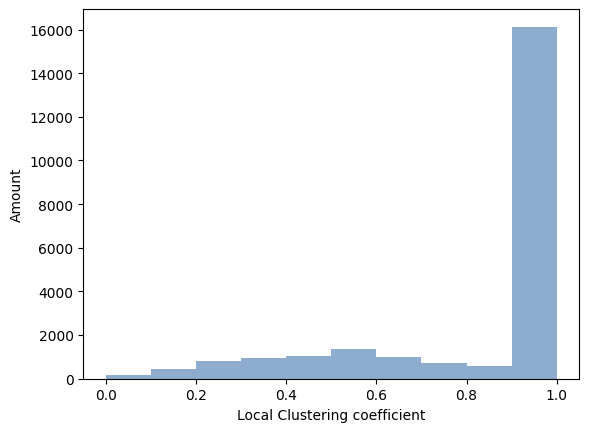

In [43]:
net.plot_hist_clustering_coeff_by_amount(collaborators_projection_network)

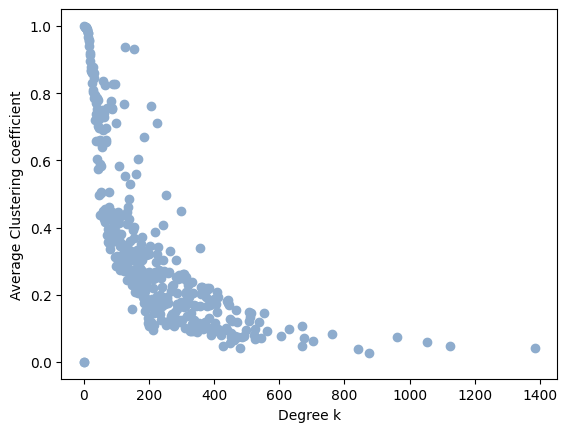

In [37]:
net.plot_clustering_coeff_by_degree(collaborators_projection_network)

### Centralities Analysis

#### Degree centralities

In [106]:
top_artists_names = net.get_degree_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

#### Eigenvector centralities

In [ ]:
top_artists_names = net.get_eigenvector_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

#### Betweenness centrality

In [ ]:
top_artists_names = net.get_betweenness_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

#### Correlation between the centralities 

In [9]:
names = net.get_spearman_corr(collaborators_projection_network)

Spearman corr between projected degree k and betweenness centrality SignificanceResult(statistic=0.9988715437443674, pvalue=2.8063564772254223e-25)
Spearman corr between projected degree k and eigenvector centrality is  SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)
Spearman corr between betweenness centrality and eigenvector centrality SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)


In [40]:
artists_dict = dict()
artist_set = set()
for c in names:
   artist_set.add(collaborators_projection_network.nodes[c]['name'])
artist_set

{'al schmitt',
 'bernie grundman',
 'bill frisell',
 'bob ludwig',
 'chick corea',
 'dave holland',
 'david baker',
 'evan parker',
 'greg calbi',
 'herbie hancock',
 'hermeto pascoal',
 'jack dejohnette',
 'jan erik kongshaug',
 'kenny wheeler',
 'manfred eicher',
 'martin s. gold',
 'ron carter',
 'rudy van gelder',
 'scott hull',
 'wayne shorter'}

## All Time album Network

In [2]:
albums = None
with open('../data/albums/all_time_album-final.json',encoding="UTF-8") as f:
        albums = json.load(f)   

FileNotFoundError: [Errno 2] No such file or directory: '../data/albums/all_time_album-final.json'

In [33]:
album_projection_network = net.build_album_projection_network(albums,'title','artists')
net.get_network_info(album_projection_network)

nb nodes:  3971
nb edges:  46696
Min node degree:  0
Max node degree:  200
Avg node degree:  23.518509191639385


In [34]:
net.save_graph(album_projection_network,"../networks/gephi/all_time_album_projection.gexf")

In [30]:
collaborators_projection_network = net.build_collaborators_projection_network(albums,'artists')
net.get_network_info(collaborators_projection_network)     

nb nodes:  27406
nb edges:  37354
Min node degree:  1
Max node degree:  153
Avg node degree:  2.725972414799679


In [31]:
net.save_graph(collaborators_projection_network,"../networks/gephi/all_time_collaborators_projection.gexf")

# Montreux networks

In [2]:
mjf = None
with open('../data/mjf/mfj_export_clean-final.json',encoding="UTF-8") as f:
        mjf = json.load(f)      
results_mjf = mjf

In [3]:
def get_results_bipartite(id,results) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
                if art['id'] == int(str(id)[3:]):
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                    for r in row['categories']:
                        artists_dict[art['name']].append(r)
                    break    
    return artists_dict

In [4]:
def get_results(name,results) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
                if art['id'] == int(str(name)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    #if len(art['role']) == 0 or art['role'][0] == "" : 
                     #   print("none")
                      #  artists_dict[art['name']].append("none")

                    #for r in art['role']:
                     #   artists_dict[art['name']].append(r)
                    artists_dict[art['name']].append(row['id'])
                    
                    break    
                
    return artists_dict

In [5]:
def get_details_by_centrality(centrality,results) :
    names = list()
    idx = 1
    for n in centrality :
        result = get_results_bipartite(n,results)
        names.append(list(result.keys())[0])
        print(idx,"-",list(result.keys())[0],"-",Counter(list(result.values())[0]))
        idx += 1
    return names    

In [6]:
def gender_dist_top100(musicians,df_gender):
    #Gender distribution
    genders = list()
    for id in musicians[:100]  :
        gender = df_gender[df_gender["id"] == int(str(id)[3:])]["gender"].iloc[0]
        if gender != "unknown":
            genders.append(gender)
    print(pd.Series(Counter(genders)))

In [7]:
df = pd.read_csv("../data/artists/mjf_art_gender.csv",sep=",")

## Bipartite Graph

In [9]:
bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories')
net.get_network_info(bipartite_mjf_net)

nb nodes:  21919
nb edges:  26552
Min node degree:  1
Max node degree:  83
Avg node degree:  2.4227382636069166


In [59]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0]
names = get_details_by_centrality(bd_centralities[:20],results_mjf)

1 - claude nobs - Counter({'R&B/Soul & blues': 44, 'Jazz': 18, 'Rock/Metal': 15, 'Folk': 4, 'World Music': 3, 'Pop': 3, 'Hip-Hop/Rap': 2, 'Classical/Contemporary': 1, 'Other': 1})
2 - george duke - Counter({'Jazz': 41, 'R&B/Soul & blues': 17, 'Pop': 4, 'Other': 4, 'Rock/Metal': 2, 'Electronic/Dance': 2, 'Hip-Hop/Rap': 1, 'World Music': 1})
3 - herbie hancock - Counter({'Jazz': 34, 'World Music': 4, 'Rock/Metal': 4, 'R&B/Soul & blues': 3, 'Classical/Contemporary': 2})
4 - david sanborn - Counter({'Jazz': 30, 'R&B/Soul & blues': 7, 'World Music': 2, 'Rock/Metal': 1})
5 - joe sample - Counter({'Jazz': 22, 'R&B/Soul & blues': 7, 'World Music': 1})
6 - al jarreau - Counter({'Jazz': 25, 'R&B/Soul & blues': 14, 'Other': 2, 'World Music': 2, 'Pop': 1, 'Hip-Hop/Rap': 1})
7 - george benson - Counter({'Jazz': 18, 'R&B/Soul & blues': 18, 'Pop': 2, 'Hip-Hop/Rap': 1})
8 - john mclaughlin - Counter({'Jazz': 18, 'World Music': 9, 'Rock/Metal': 7, 'R&B/Soul & blues': 3, 'Other': 3, 'Classical/Contempor

### Bipartite degree centrality before year 2000

In [14]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0]
names = get_details_by_centrality(bd_centralities[:100],results_mjf)

1 - claude nobs - Counter({'harmonica': 63, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'synthesizer': 1})
3 - herbie hancock - Counter({'piano': 35, 'keyboards': 14})
4 - david sanborn - Counter({'saxophone': 32})
5 - milt jackson - Counter({'vibraphone': 19})
6 - nathan east - Counter({'recorder': 23, 'vocals': 3})
7 - niels pedersen - Counter({'recorder': 15, 'double bass': 1})
8 - dizzy gillespie - Counter({'trumpet': 13, 'vocals': 1, 'harp': 1})
9 - al jarreau - Counter({'vocals': 22, 'vocal': 1, 'marimba': 1, 'drums': 1})
10 - rachelle ferrell - Counter({'vocals': 20, 'piano': 4, 'keyboards': 1})
11 - calep emphrey, jr. - Counter({'drums': 20})
12 - billy cobham - Counter({'drums': 19, 'percussions': 1})
13 - michael brecker - Counter({'saxophone': 12, 'recorder': 5, 'electronic wind instrument   ewi': 2})
14 - clark terry - Counter({'trumpet': 11, 'flugelhorn': 3, 'vocals': 1})
15 - oscar peterson - Counter({'p

In [15]:
names

['claude nobs',
 'george duke',
 'herbie hancock',
 'david sanborn',
 'milt jackson',
 'nathan east',
 'niels pedersen',
 'dizzy gillespie',
 'al jarreau',
 'rachelle ferrell',
 'calep emphrey, jr.',
 'billy cobham',
 'michael brecker',
 'clark terry',
 'oscar peterson',
 'joe sample',
 'steve ferrone',
 'ray brown',
 'b.b. king',
 'chaka khan',
 'oliver "bops junior" jackson',
 'randy brecker',
 'john mclaughlin',
 'toots thielemans',
 'monty alexander',
 'sammy figueroa',
 'george benson',
 'larry coryell',
 'van morrison',
 'james "boogaloo" bolden',
 'klaus doldinger',
 'leon warren',
 'greg phillinganes',
 'john marshall',
 'billy hart',
 'clarence "gatemouth" brown',
 'miles davis',
 'al foster',
 'howard johnson',
 'john scofield',
 'luther allison',
 'larry carlton',
 'john lewis',
 'albert collins',
 'lenny castro',
 'quincy jones',
 'eddie gomez',
 'chick corea',
 'tommy flanagan',
 'etta james',
 'wayne shorter',
 'jeff hamilton',
 'raphael cruz',
 'gilberto gil',
 'robben f

In [13]:
gender_dist_top100(bd_centralities[:100],df)

male      94
female     5
dtype: int64


In [ ]:
sorted(bipartite_mjf_net.degree, key=lambda x: x[1], reverse=True)

### Bipartite degree centrality after year 2000

In [20]:
bd_centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)[0]
names = get_details_by_centrality(bd_centralities[:100],results_mjf)

1 - claude nobs - Counter({'harmonica': 63, 'harp': 1, 'vocals': 1, 'percussions': 1})
2 - herbie hancock - Counter({'piano': 35, 'keyboards': 14})
3 - angélique kidjo - Counter({'vocals': 17})
4 - carlos santana - Counter({'guitar': 18, 'vocals': 4, 'percussions': 1})
5 - george duke - Counter({'keyboards': 33, 'piano': 30, 'vocals': 4, 'synthesizer': 1})
6 - joe sample - Counter({'piano': 19, 'keyboards': 9})
7 - chick corea - Counter({'piano': 21, 'keyboards': 5, 'organ': 1})
8 - george benson - Counter({'guitar': 23, 'vocals': 22})
9 - marcus miller - Counter({'recorder': 19, 'clarinet': 6, 'saxophone': 4, 'vocals': 2, 'turntables': 1, 'double bass': 1, 'keyboards': 1, 'gumbri': 1})
10 - quincy jones - Counter({'vocals': 4})
11 - john mclaughlin - Counter({'guitar': 25, 'vocals': 1})
12 - lee ritenour - Counter({'guitar': 17})
13 - david sanborn - Counter({'saxophone': 32})
14 - chester thompson - Counter({'keyboards': 11, 'drums': 5, 'vocals': 2})
15 - andy vargas - Counter({'voca

In [21]:
names

['claude nobs',
 'herbie hancock',
 'angélique kidjo',
 'carlos santana',
 'george duke',
 'joe sample',
 'chick corea',
 'george benson',
 'marcus miller',
 'quincy jones',
 'john mclaughlin',
 'lee ritenour',
 'david sanborn',
 'chester thompson',
 'andy vargas',
 'benny rietveld',
 'dennis chambers',
 'monty alexander',
 'al jarreau',
 "michael o'neill",
 'stanley banks',
 'thom hall',
 'raul rekow',
 'van morrison',
 'grégoire maret',
 'karl perazzo',
 'paolo nutini',
 'alfredo rodríguez',
 'richard bona',
 'b.b. king',
 'walter king',
 'stanley abernathy',
 'james "boogaloo" bolden',
 "lil' son jackson",
 'gilberto gil',
 'christian mcbride',
 'buddy guy',
 'orlando wright',
 'mick hucknall',
 'patti austin',
 'jeff cressman',
 'bill ortiz',
 'susan tedeschi',
 'brad mehldau',
 'gilles peterson',
 'ian gillan',
 'steve morse',
 'roger glover',
 'ian paice',
 'john scofield',
 'randy crawford',
 'solomon burke',
 'woodkid',
 'horace andy',
 "youssou n'dour",
 'pat metheny',
 'charl

In [21]:
gender_dist_top100(bd_centralities[:100],df)

male      88
female    11
dtype: int64


In [22]:
bd_centralities[:10]

[999845,
 999628,
 999949,
 9991371,
 999133,
 9991610,
 9991454,
 9991107,
 999120,
 9991477]

In [ ]:
sorted(bipartite_mjf_net.degree, key=lambda x: x[1], reverse=True)

## Concerts Network

In [28]:
#mjf_event_net = net.build_album_projection_network(results,'name','musicians','date')
albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
mjf_event_net = bipartite.weighted_projected_graph(bipartite_mjf_net, albums)
net.get_network_info(mjf_event_net)

nb nodes:  4280
nb edges:  22057
Min node degree:  0
Max node degree:  306
Avg node degree:  10.307009345794393


In [16]:
net.save_graph(mjf_event_net,"../networks/gephi/mjf/mjf_concerts_network.gexf")

In [7]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
print("nb nodes :", len(largest_cc))
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_event_net),"%")

nb nodes : 2875
percentage of nodes in the giant component:  67.17289719626169 %


In [15]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_event_net)
net.get_nb_of_connected_comp(mjf_event_net)
#net.get_avg_weighted_degree(mjf_event_net)
net.get_avg_clustering_coefficent(mjf_event_net)

Diameter :  17
Density :  0.0024087425440042984
Nb connected components :  1133
Average clustering coefficient :  0.38695234543548535


## Collaboration network 

In [10]:
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)

net.get_network_info(mjf_collaboration_net)

nb nodes:  17639
nb edges:  108230
Min node degree:  0
Max node degree:  550
Avg node degree:  12.271670729633199


In [17]:
degrees = sorted(mjf_collaboration_net.degree, key=lambda x: x[1], reverse=True)

In [13]:
net.save_graph(mjf_collaboration_net,"../networks/gephi/mjf_collaboration_network.gexf")

### Clusterirng 

133


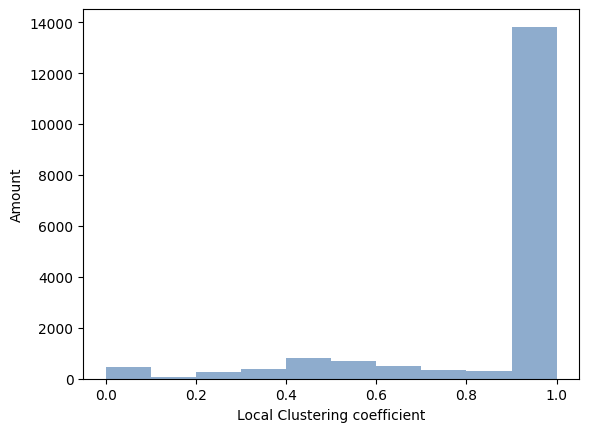

In [18]:
net.plot_hist_clustering_coeff_by_amount(mjf_collaboration_net)

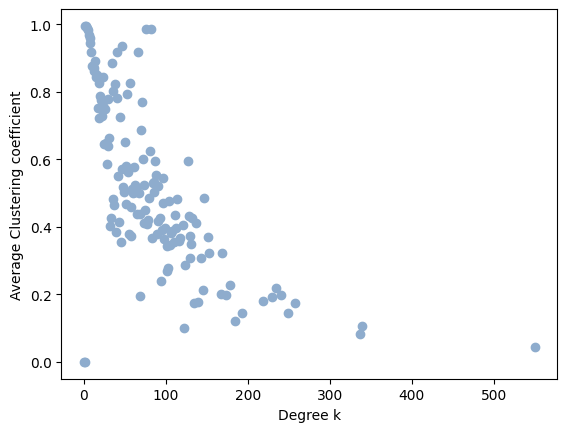

In [20]:
net.plot_clustering_coeff_by_degree(mjf_collaboration_net)

In [9]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
print("nb nodes :", len(largest_cc))
#percentage of nodes in the giant component :
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")

nb nodes : 11727
percentage of nodes in the giant component:  66.48336073473553 %


In [17]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_collaboration_net)
net.get_nb_of_connected_comp(mjf_collaboration_net)
#net.get_avg_weighted_degree(mjf_collaboration_net)
net.get_avg_clustering_coefficent(mjf_collaboration_net)

Diameter :  18
Density :  0.000695751827283887
Nb connected components :  1133
Average clustering coefficient :  0.8844055712809402


### Centralities

In [ ]:
d_centralities = net.get_weighted_deg_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21],results_mjf)

#### Degree centrality Before 2000

In [25]:
d_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21])

1 - claude nobs - Counter({'R&B/Soul & blues': 44, 'Jazz': 18, 'Rock/Metal': 15, 'none': 9, 'Folk': 4, 'World Music': 3, 'Pop': 3, 'Hip-Hop/Rap': 2, 'Classical/Contemporary': 1, 'Other': 1})
2 - george duke - Counter({'Jazz': 41, 'R&B/Soul & blues': 17, 'Pop': 4, 'Other': 4, 'Rock/Metal': 2, 'Electronic/Dance': 2, 'none': 2, 'Hip-Hop/Rap': 1, 'World Music': 1})
3 - quincy jones - Counter({'none': 19, 'Jazz': 18, 'R&B/Soul & blues': 6, 'World Music': 5, 'Other': 3, 'Pop': 2, 'Hip-Hop/Rap': 2})
4 - nathan east - Counter({'Jazz': 17, 'R&B/Soul & blues': 8, 'Rock/Metal': 1, 'Pop': 1, 'Hip-Hop/Rap': 1, 'Other': 1})
5 - chaka khan - Counter({'Jazz': 14, 'R&B/Soul & blues': 11, 'Pop': 2, 'Rock/Metal': 1, 'Hip-Hop/Rap': 1, 'Electronic/Dance': 1, 'none': 1})
6 - steve ferrone - Counter({'R&B/Soul & blues': 10, 'Jazz': 7, 'Pop': 1, 'Other': 1})
7 - toots thielemans - Counter({'Jazz': 12, 'R&B/Soul & blues': 4, 'Hip-Hop/Rap': 1, 'World Music': 1, 'none': 1})
8 - greg phillinganes - Counter({'Jazz

#### Degree centrality After 2000

In [49]:
d_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
get_details_by_centrality(d_centralities[:21])

1 - claude nobs - Counter({'R&B/Soul & blues': 44, 'Jazz': 18, 'Rock/Metal': 15, 'none': 9, 'Folk': 4, 'World Music': 3, 'Pop': 3, 'Hip-Hop/Rap': 2, 'Classical/Contemporary': 1, 'Other': 1})
2 - herbie hancock - Counter({'Jazz': 34, 'World Music': 4, 'Rock/Metal': 4, 'R&B/Soul & blues': 3, 'Classical/Contemporary': 2, 'none': 1})
3 - angélique kidjo - Counter({'World Music': 13, 'Jazz': 11, 'Rock/Metal': 3, 'none': 2, 'R&B/Soul & blues': 2, 'Classical/Contemporary': 1})
4 - pepe lienhard - Counter({'none': 6, 'Jazz': 6, 'R&B/Soul & blues': 1})
5 - patti austin - Counter({'Jazz': 11, 'Rock/Metal': 3, 'World Music': 3, 'R&B/Soul & blues': 3, 'none': 2, 'Classical/Contemporary': 1, 'Folk': 1})
6 - lee ritenour - Counter({'Jazz': 15, 'R&B/Soul & blues': 4})
7 - adrian pflugshaupt - Counter({'Jazz': 7, 'R&B/Soul & blues': 1, 'none': 1})
8 - ibrahim maalouf - Counter()
9 - ronan yvin - Counter({'Pop': 1})
10 - quincy jones - Counter({'none': 19, 'Jazz': 18, 'R&B/Soul & blues': 6, 'World Musi

### Gender distribution before/after year 2000

In [9]:
def get_results_gender_dist(name,results) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
                if art['id'] == int(str(name)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    #if len(art['role']) == 0 or art['role'][0] == "" : 
                     #   print("none")
                      #  artists_dict[art['name']].append("none")

                    #for r in art['role']:
                     #   artists_dict[art['name']].append(r)
                    artists_dict[art['name']].append(row['id'])
                    
                    break    
                
    return artists_dict

In [61]:
def get_gender_dist(ids,df,results):
    genders = [0,0,0]
    for id in ids :
        result = get_results_gender_dist(id,results)
       
        genres_dist = dict(Counter(list(result.values())[0]))
       
        nb_repr = sum(genres_dist.values())
    
        current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
   
        if current_gender == "male" :
            genders[0]+=nb_repr
        elif current_gender == "female":
            genders[1]+=nb_repr
        elif  current_gender == "other":
            genders[2]+=nb_repr
    
    return genders

In [70]:
date_intervals =[(1967,1981),(1982,1995),(1996,2009),(2010,2023)]
bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',2000,2023)
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)

In [72]:
df = pd.read_csv("../data/artists/mjf_art_gender.csv")
degree_centralities = net.get_weighted_deg_centrality(mjf_collaboration_net)[0]
genders = get_gender_dist(degree_centralities,df,results_mjf)

In [73]:
genders     

[12474, 2113, 13]

male      13070
female     1444
other         0
dtype: int64


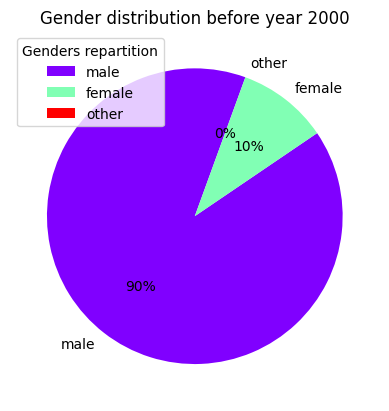

In [69]:
y =  pd.Series(genders,index= ["male", "female","other"])
print(y)
mylabels = ["male", "female" ,"other"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors,normalize=True)
plt.legend(title = "Genders repartition",loc="upper left")
plt.title('Gender distribution before year 2000')
plt.savefig("../data/repartition/women/mjf/evolution/gender_bf_2000_per.png", format="png",transparent=True)
plt.show() 

3


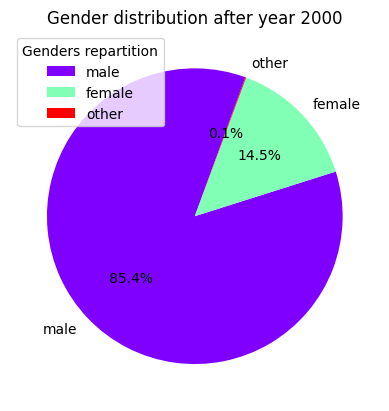

In [75]:
y =  pd.Series(genders,index= ["male", "female","other"])
print(len(y))
mylabels = ["male", "female" ,"other"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70,  autopct='%1.1f%%',colors=colors)
plt.legend(title = "Genders repartition",loc="upper left")
plt.title('Gender distribution after year 2000')
plt.savefig("../data/repartition/women/mjf/evolution/gender_af_2000_per.png", format="png",transparent=True)
plt.show() 

### Gender distribution by music genre

In [50]:
gender_dist_by_genre = get_gender_dist_by_genre(d_centralities,df)
del gender_dist_by_genre['none']
female_role_dist = get_role_dist_female(d_centralities,df)
female_role_dist_detailed = get_role_dist_by_gender_detailed(d_centralities,df,"female")
male_role_dist_detailed = get_role_dist_by_gender_detailed(d_centralities,df,"male")
gender_dist_by_genre_final = dict(sorted(gender_dist_by_genre.items(), key=lambda item: item[1],reverse=True))
gender_dist_by_genre_final = dict(list(gender_dist_by_genre_final.items())[0:10])

### Women and roles

In [11]:
def get_results_role_dist(name,results) : 
    artists_dict = dict()
    for row in results : 
      
        for art in row['musicians'] :
                if art['id'] == int(str(name)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = list()
                   
                    if len(art['role']) == 0 or art['role'][0] == "" :
                        artists_dict[art['name']].append("none")

                    for r in art['role']:
                        artists_dict[art['name']].append(r)         

                    break    
                
    return artists_dict

In [12]:
def get_role_dist_female(ids,df,results):
    role_dist_female_dict = dict()
    for id in ids :
        result = get_results_role_dist(id,results)
        genres_dist = dict(Counter(list(result.values())[0]))
        for key, value in genres_dist.items():
            current_role = key
          
            if  key == "vocal" or key == "vocals" :
                current_role = "vocal"
            elif key != "none" :   
                current_role = "instrument" 
                
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == "female":
                if current_role not in list(role_dist_female_dict.keys()):
                    role_dist_female_dict[current_role] = 0 #female 
                role_dist_female_dict[current_role] += value
        
    return role_dist_female_dict

In [13]:
def get_role_dist_by_gender_detailed(ids,df,results,gender):
    role_dist_dict = dict()
    for id in ids :
        result = get_results_role_dist(id,results)
        genres_dist = dict(Counter(list(result.values())[0]))
        for key, value in genres_dist.items():
           
            current_gender = df[df["id"] == int(str(id)[3:])]["gender"].iloc[0]
         
            if current_gender == gender:
                if key not in list(role_dist_dict.keys()):
                    role_dist_dict[key] = 0 #female    
                role_dist_dict[key] += value
        
    return role_dist_dict

In [14]:

df = pd.read_csv("../data/artists/mjf_art_gender.csv")
degree_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
women_roles_dist = get_role_dist_female(degree_centralities,df,results_mjf) 
del women_roles_dist['none']

In [39]:
women_roles_dist

{'vocal': 1044, 'instrument': 915}

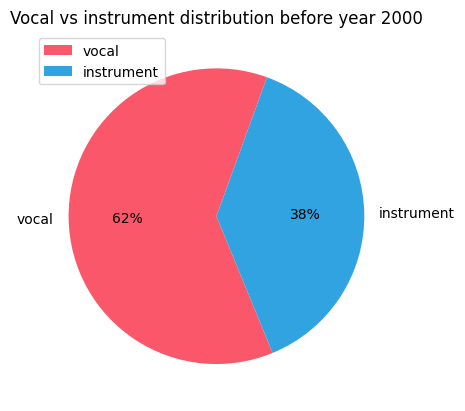

In [33]:
y = pd.Series(women_roles_dist)
mylabels = ["vocal","instrument"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = None,startangle = 70,  autopct='%1.0f%%',colors=['#fa576a','#31a3e0'])
plt.legend(title = "",loc="upper left")
plt.title("Vocal vs instrument distribution before year 2000")
plt.savefig("../data/repartition/women/mjf/role/v_vs_i_bf_2000_per.png", format="png",transparent=True)
plt.show() 

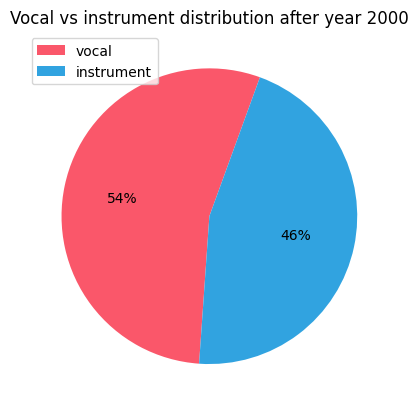

In [17]:
y = pd.Series(women_roles_dist)
mylabels = ["vocal","instrument"]
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, startangle = 70, autopct='%1.0f%%',colors=['#fa576a','#31a3e0'],labels=None)
plt.legend(title = "",loc="upper left",labels=mylabels)
plt.title("Vocal vs instrument distribution after year 2000")
plt.savefig("../data/repartition/women/mjf/role/v_vs_i_af_2000_per.png", format="png",transparent=True)
plt.show() 

#### All instruments comparaison

In [18]:
results_mjf = None
with open("../data/mjf/mfj_export_clean-final_all_in.json",encoding="utf-8") as f:
            results_mjf = json.load(f) 

bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',2001,2023)
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)

In [19]:
df = pd.read_csv("../data/artists/mjf_art_gender.csv")
degree_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
women_roles_dist_all = get_role_dist_by_gender_detailed(degree_centralities,df,results_mjf,'female') 
temp_dict = women_roles_dist_all

In [20]:
#del temp_dict['vocals']
del temp_dict['Vocals']
del temp_dict['none']
temp_dict = dict(sorted(temp_dict.items(), key=lambda item: item[1],reverse=True))
women_roles_dist_all_final = dict(list(temp_dict.items())[0:10])

In [21]:
dict_other = dict(list(temp_dict.items())[11:])
sum_other = sum(dict_other.values())
print(sum_other)
women_roles_dist_all_final["other"] = sum_other

180


In [22]:
women_roles_dist_all_final

{'Guitar': 167,
 'Keyboards': 118,
 'Piano': 82,
 'Violin': 72,
 'Bass': 71,
 'Drums': 64,
 'Percussions': 53,
 'Cello': 39,
 'Viola': 31,
 'Voice': 26,
 'other': 180}

#### Before 2000

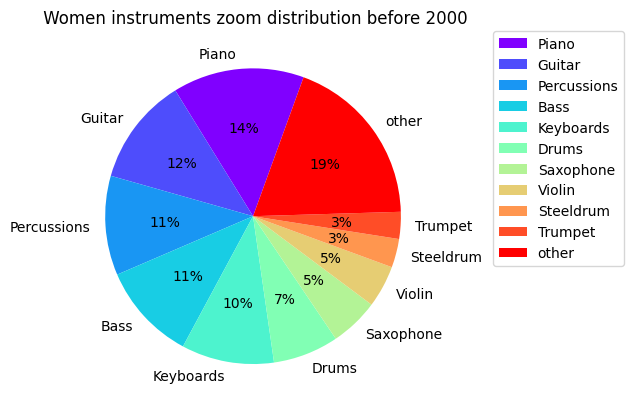

In [39]:
y = pd.Series(Counter(women_roles_dist_all_final))
mylabels = list(women_roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Women instruments zoom distribution before 2000")
plt.savefig("../data/repartition/women/mjf/instrument_zoom_dist_bf_2000_final.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

#### After 2000

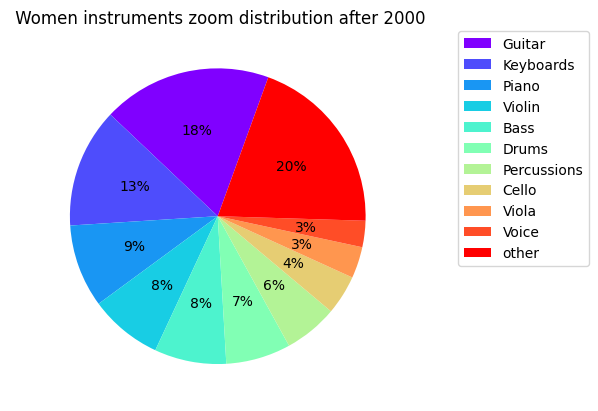

In [23]:
y = pd.Series(Counter(women_roles_dist_all_final))
mylabels = list(women_roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = None,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, labels = mylabels, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Women instruments zoom distribution after 2000")
plt.savefig("../data/repartition/women/mjf/instrument_zoom_dist_af_2000_final.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

#### Women vs Men instruments

In [60]:
results_mjf = None
with open("../data/mjf/mfj_export_clean-final_all_in.json",encoding="utf-8") as f:
            results_mjf = json.load(f) 

bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',1967,2023)
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)

In [61]:
df = pd.read_csv("../data/artists/mjf_art_gender.csv")
degree_centralities = net.get_degree_centrality(mjf_collaboration_net)[0]
roles_dist_all = get_role_dist_by_gender_detailed(degree_centralities,df,results_mjf,'female') 
temp_dict = roles_dist_all


In [62]:
del temp_dict['Vocals']
del temp_dict['none']
temp_dict = dict(sorted(temp_dict.items(), key=lambda item: item[1],reverse=True))
roles_dist_all_final = dict(list(temp_dict.items())[0:10])

In [63]:
roles_dist_all_final

{'Guitar': 208,
 'Keyboards': 151,
 'Piano': 122,
 'Bass': 112,
 'Percussions': 100,
 'Violin': 90,
 'Drums': 87,
 'Cello': 49,
 'Saxophone': 40,
 'Trumpet': 33}

In [64]:
dict_other = dict(list(temp_dict.items())[11:])
sum_other = sum(dict_other.values())
roles_dist_all_final["other"] = sum_other

In [65]:
roles_dist_all_final

{'Guitar': 208,
 'Keyboards': 151,
 'Piano': 122,
 'Bass': 112,
 'Percussions': 100,
 'Violin': 90,
 'Drums': 87,
 'Cello': 49,
 'Saxophone': 40,
 'Trumpet': 33,
 'other': 296}

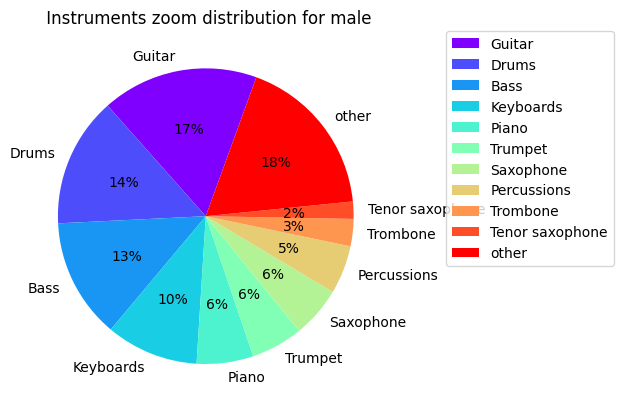

In [59]:
y =  pd.Series(Counter(roles_dist_all_final))
mylabels = list(roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Instruments zoom distribution for male")
plt.savefig("../data/repartition/women/mjf/zoom/final/instrument_zoom_dist_bf_2000_male_per.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

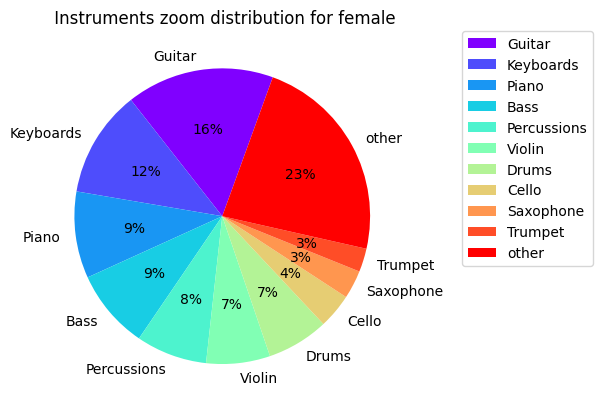

In [67]:
y =  pd.Series(Counter(roles_dist_all_final))
mylabels = list(roles_dist_all_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Instruments zoom distribution for female")
plt.savefig("../data/repartition/women/mjf/zoom/final/instrument_zoom_dist_bf_2000_female_per.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

In [52]:
c = []
v = []             
for key, val in gender_dist_by_genre.items():
    c.append(key)
    v.append(val)
v = np.array(v)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
p= plt.bar(range(len(c)), v[:,0],label="Male",color="#f39d47",bottom= np.zeros(10))
ticklabel = [f"{'%.2f'%((100*a)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

p= plt.bar(range(len(c)), v[:,1], bottom=v[:,0],label="Female",color="#72bbff")
ticklabel = [f"{'%.2f'%((100*b)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center',labels=ticklabel)

plt.title("Gender distribution by music genres after year 2000")
plt.xticks(range(len(c)), c,rotation=85)
plt.legend()
plt.savefig("../data/repartition/women/gender_dist_by_genre_af2000.png", format="png",transparent=True, bbox_inches='tight')
plt.show()

In [23]:
gender_dist_by_genre_final

{'guitar': [3632, 220, 1],
 'recorder': [3208, 122, 0],
 'drums': [2926, 87, 0],
 'keyboards': [2080, 151, 2],
 'saxophone': [1557, 58, 0],
 'piano': [1303, 124, 2],
 'trumpet': [1170, 33, 0],
 'percussions': [1087, 100, 1],
 'trombone': [613, 17, 0],
 'flute': [355, 22, 0],
 'harmonica': [209, 4, 0],
 'dj': [177, 11, 0],
 'violin': [173, 90, 0],
 'clarinet': [129, 7, 0],
 'flugelhorn': [129, 2, 0]}

In [32]:
gender_dist_by_genre_final

{'guitar': [3632, 220, 1],
 'recorder': [3208, 122, 0],
 'drums': [2926, 87, 0],
 'keyboards': [2080, 151, 2],
 'saxophone': [1557, 58, 0],
 'piano': [1303, 124, 2],
 'trumpet': [1170, 33, 0],
 'percussions': [1087, 100, 1],
 'trombone': [613, 17, 0],
 'flute': [355, 22, 0],
 'harmonica': [209, 4, 0],
 'dj': [177, 11, 0],
 'violin': [173, 90, 0],
 'clarinet': [129, 7, 0],
 'flugelhorn': [129, 2, 0]}

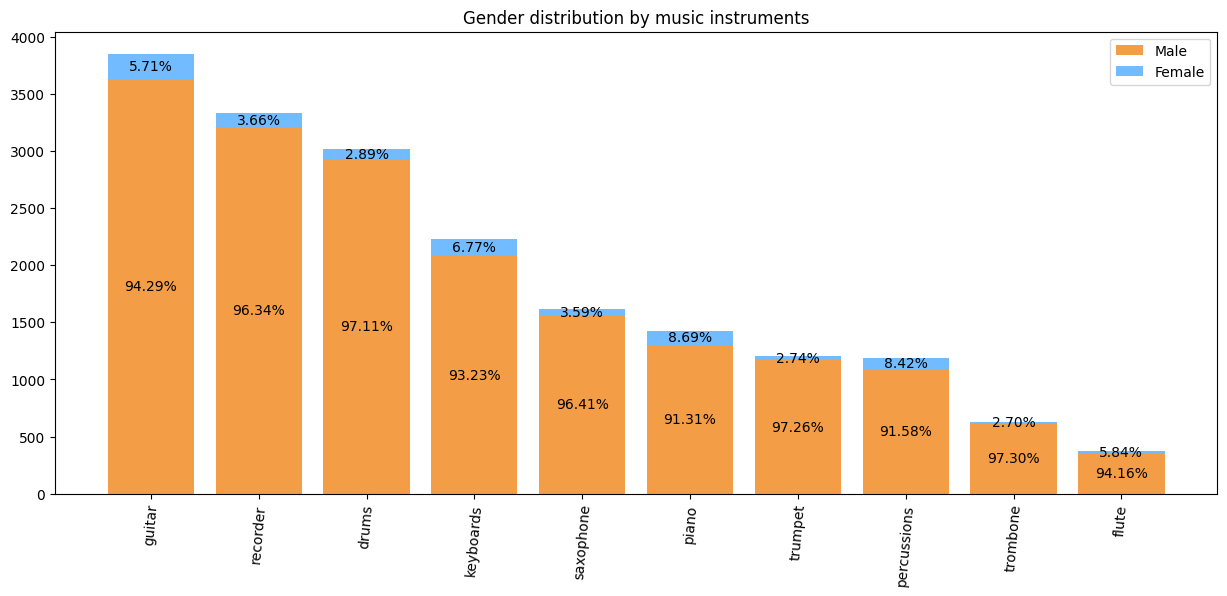

In [35]:
c = []
v = []             
for key, val in gender_dist_by_genre_final.items():
    c.append(key)
    v.append(val)
v = np.array(v)
fig, ax = plt.subplots(figsize=(15,6))

p= plt.bar(range(len(c)), v[:,0],label="Male",color="#f39d47",bottom= np.zeros(10))
ticklabel = [f"{'%.2f'%((100*a)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

p= plt.bar(range(len(c)), v[:,1], bottom=v[:,0],label="Female",color="#72bbff")
ticklabel = [f"{'%.2f'%((100*b)/(b+a))}%" for a,b in zip( v[:,0],  v[:,1]) ]
ax.bar_label(p, label_type='center', labels=ticklabel)

plt.title("Gender distribution by music instruments")
plt.xticks(range(len(c)), c,rotation=85)
plt.legend()
plt.savefig("../data/repartition/instrument_dist.png", format="png",transparent=True)
plt.show()


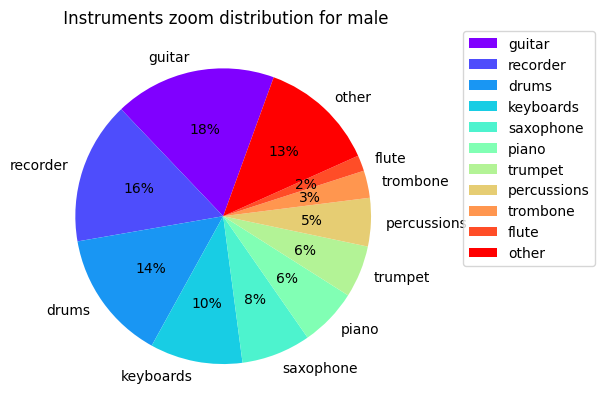

In [175]:
y =  pd.Series(Counter(male_role_dist_detailed_final))
mylabels = list(male_role_dist_detailed_final.keys())
colors = cm.rainbow(np.linspace(0, 1, len(mylabels)))
plt.pie(y, labels = mylabels,startangle = 70, autopct='%1.0f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)                                                                                                                                                                                                                                  
plt.title(" Instruments zoom distribution for male")
#plt.savefig("../data/repartition/instrument_zoom_dist_bf_2000_male_per.png", format="png",transparent=True,bbox_inches='tight')
plt.show() 

### Betweenness centrality

In [35]:
b_centralities = net.get_betweenness_centrality(mjf_collaboration_net)[0][:25]

In [36]:
get_details_by_centrality(b_centralities,results_mjf)

1 - claude nobs - Counter({'R&B/Soul & blues': 44, 'Jazz': 18, 'Rock/Metal': 15, 'Folk': 4, 'World Music': 3, 'Pop': 3, 'Hip-Hop/Rap': 2, 'Classical/Contemporary': 1, 'Other': 1})
2 - quincy jones - Counter({'Jazz': 18, 'R&B/Soul & blues': 6, 'World Music': 5, 'Other': 3, 'Pop': 2, 'Hip-Hop/Rap': 2})
3 - george duke - Counter({'Jazz': 41, 'R&B/Soul & blues': 17, 'Pop': 4, 'Other': 4, 'Rock/Metal': 2, 'Electronic/Dance': 2, 'Hip-Hop/Rap': 1, 'World Music': 1})
4 - monty alexander - Counter({'Jazz': 18, 'World Music': 5, 'R&B/Soul & blues': 2, 'Other': 1})
5 - herbie hancock - Counter({'Jazz': 34, 'World Music': 4, 'Rock/Metal': 4, 'R&B/Soul & blues': 3, 'Classical/Contemporary': 2})
6 - gilberto gil - Counter({'World Music': 14, 'Jazz': 5})
7 - chaka khan - Counter({'Jazz': 14, 'R&B/Soul & blues': 11, 'Pop': 2, 'Rock/Metal': 1, 'Hip-Hop/Rap': 1, 'Electronic/Dance': 1})
8 - david sanborn - Counter({'Jazz': 30, 'R&B/Soul & blues': 7, 'World Music': 2, 'Rock/Metal': 1})
9 - angélique kidjo

['claude nobs',
 'quincy jones',
 'george duke',
 'monty alexander',
 'herbie hancock',
 'gilberto gil',
 'chaka khan',
 'david sanborn',
 'angélique kidjo',
 'toots thielemans',
 'marcus miller',
 'clark terry',
 'elba ramalho',
 'grace jones',
 'richard bona',
 'beverley knight',
 'carlos santana',
 'van morrison',
 'chester thompson',
 'randy brecker',
 'frank lacy',
 'paolo nutini',
 'carlinhos brown',
 'b.b. king',
 'mark ronson']

### Eigenvector centrality

In [26]:
e_centralities = net.get_eigenvector_centrality(mjf_collaboration_net)[0][:30]

In [31]:
names = get_details_by_centrality(e_centralities[:20],results_mjf)

1 - nathan east - Counter({'Jazz': 17, 'R&B/Soul & blues': 8, 'Rock/Metal': 1, 'Pop': 1, 'Hip-Hop/Rap': 1, 'Other': 1})
2 - claude nobs - Counter({'R&B/Soul & blues': 44, 'Jazz': 18, 'Rock/Metal': 15, 'Folk': 4, 'World Music': 3, 'Pop': 3, 'Hip-Hop/Rap': 2, 'Classical/Contemporary': 1, 'Other': 1})
3 - greg phillinganes - Counter({'Jazz': 11, 'R&B/Soul & blues': 9, 'Rock/Metal': 1, 'Pop': 1, 'Hip-Hop/Rap': 1, 'Other': 1, 'World Music': 1})
4 - chaka khan - Counter({'Jazz': 14, 'R&B/Soul & blues': 11, 'Pop': 2, 'Rock/Metal': 1, 'Hip-Hop/Rap': 1, 'Electronic/Dance': 1})
5 - patti austin - Counter({'Jazz': 11, 'Rock/Metal': 3, 'World Music': 3, 'R&B/Soul & blues': 3, 'Classical/Contemporary': 1, 'Folk': 1})
6 - toots thielemans - Counter({'Jazz': 12, 'R&B/Soul & blues': 4, 'Hip-Hop/Rap': 1, 'World Music': 1})
7 - mick hucknall - Counter({'Pop': 8, 'R&B/Soul & blues': 7, 'Jazz': 6, 'Electronic/Dance': 1})
8 - quincy jones - Counter({'Jazz': 18, 'R&B/Soul & blues': 6, 'World Music': 5, 'Oth

### Correlation between centralities

In [10]:
net.get_spearman_corr(mjf_collaboration_net)

Spearman corr between projected degree k and betweenness centrality is SignificanceResult(statistic=0.7035665508131586, pvalue=0.0)
Spearman corr between projected degree k and eigenvector centrality is SignificanceResult(statistic=0.9981353368918797, pvalue=0.0)
Spearman corr between betweenness centrality and eigenvector centrality is SignificanceResult(statistic=0.7023793289582824, pvalue=0.0)


## Meta-Network genres

In [176]:
cat = None
with open("../data/genres/genres_cat.json",encoding="utf-8") as f:
            cat = json.load(f)  

In [79]:
date_intervals =[(1967,1981),(1982,1995),(1996,2009),(2010,2023)]


In [159]:
bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',1967,1981)
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net,collaborators)

In [135]:
for interval in date_intervals :
    
    bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',interval[0],interval[1])
    collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
    mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net,collaborators)
    #if M1 and M2 collabored together multiple time weigth of edge increases, so what to do? count once the collaboration or leave it => solved
    treated = set()
    meta_net_genres = nx.Graph()
    treated_node_weight = set()

    for cate in cat['categories']:
        meta_net_genres.add_node(cate['category'],weight=0)

    for n,d in mjf_collaboration_net.nodes(data=True):
        treated.add(int(str(n)[3:]))  
        
        #musician_in = df[df['id'] == int(str(n)[3:])]   
        genres_in = d['genres']
        for g in genres_in: 
            meta_net_genres.nodes[g]['weight'] += 1 
            
        for neighbor in mjf_collaboration_net.neighbors(n):
            if int(str(neighbor)[3:]) not in treated :
             
                
                for g_out in mjf_collaboration_net.nodes[neighbor]['genres'] :
                    for g2 in genres_in:   
                        if g_out >= g2 : 
                            continue      
                        if not meta_net_genres.has_edge(g_out,g2) :                     
                            meta_net_genres.add_edge(g_out, g2,weight = 1)   
                        else :
                            meta_net_genres[g_out][g2]['weight'] += 1      
                          
    net.save_graph(meta_net_genres,"../networks/gephi/mjf/meta-networks/genres/meta_net_genres_"+str(interval[0])+"_"+ str(interval[1])+".gexf")                                 

## Meta-Network of jazz subgenres

In [177]:
normalized_dict = pd.json_normalize(cat['categories'], sep=',')
jazz_subgenres = list(normalized_dict[(normalized_dict['category'] == 'Jazz')]['genres'])[0]
jazz_subgenres.remove("Jazz")


In [181]:
jazz_subgenres_clean =list()
for g in jazz_subgenres :
    jazz_subgenres_clean.append(g.lower())

In [202]:
for interval in date_intervals :
    
    bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories',interval[0],interval[1])
    collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
    mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)
    treated = set()
    meta_net_genres = nx.Graph()
    treated_node_weight = set()
    #Initialize a node with weight zero for each jazz genre
    for cate in jazz_subgenres_clean:
        meta_net_genres.add_node(cate,weight=0)
 
    #loop over all node in colloboration network
    for n,d in mjf_collaboration_net.nodes(data=True):
        treated.add(int(str(n)[3:]))  
        genres_in = d['subgenres']
       
        for g in genres_in: 
            g_lower= g.lower()
            if g_lower!= "jazz" and g_lower != ""  :
                if meta_net_genres.has_node(g_lower) :
                    meta_net_genres.nodes[g_lower]['weight'] += 1 
            
        for neighbor in mjf_collaboration_net.neighbors(n):
            if int(str(neighbor)[3:]) not in treated :
                musician_out_genre = mjf_collaboration_net.nodes[neighbor]['subgenres'] 
                for g_in in musician_out_genre:
                    for g2 in genres_in:   
                        g_in_l =g_in.lower()
                        g2_l = g2.lower()
                        if g_in_l >= g2_l or g_in_l not in meta_net_genres or g2_l not in meta_net_genres : 
                            continue      
                        if not meta_net_genres.has_edge(g_in_l,g2_l) :                     
                            meta_net_genres.add_edge(g_in_l, g2_l,weight = 1)   
                        else :
                            meta_net_genres[g_in_l][g2_l]['weight'] += 1      
 
    net.save_graph(meta_net_genres,"../networks/gephi/mjf/meta-networks/sub-genres/mjf_meta_net_jazz_subgenres_" +str(interval[0])+"_"+ str(interval[1])+".gexf")                             

## Role specific network

In [2]:
mjf = None
with open('../data/mjf/mfj_export_clean-final_all_in.json',encoding="UTF-8") as f:
        mjf = json.load(f)      
results_mjf = mjf

In [37]:
bipartite_mjf_net = net.build_bipartite_network(results_mjf,'name','musicians','date','categories')
net.get_network_info(bipartite_mjf_net)
print('-------------')
albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
mjf_event_net = bipartite.weighted_projected_graph(bipartite_mjf_net, albums)
net.get_network_info(mjf_event_net)
print('-------------')
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = bipartite.weighted_projected_graph(bipartite_mjf_net, collaborators)
net.get_network_info(mjf_collaboration_net)

nb nodes:  21919
nb edges:  26552
Min node degree:  1
Max node degree:  83
Avg node degree:  2.4227382636069166
-------------
nb nodes:  4280
nb edges:  22057
Min node degree:  0
Max node degree:  306
Avg node degree:  10.307009345794393
-------------
nb nodes:  17639
nb edges:  108230
Min node degree:  0
Max node degree:  550
Avg node degree:  12.271670729633199


In [6]:
instruments = pd.read_csv("../data/instruments/all_instruments.csv",sep=",")
instruments.head()

,name
0,12-string guitar
1,AD
2,Ableton
3,Accordion
4,Acoustic bass


In [24]:
print(len(mjf_collaboration_net.nodes) )

17639


In [26]:
(nb_nodes * 100)/len(mjf_collaboration_net.nodes) 

66.48336073473553

In [41]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges','nb_of_omitted_edges','nb_edges']
df = pd.DataFrame(columns=cnames)
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results_mjf,'name','musicians','date','categories',instru)
    collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
    role_specific_network = bipartite.weighted_projected_graph(role_specific_network, collaborators)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) * 100)/len(mjf_collaboration_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges)
    df.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges,abs(len(role_specific_network.edges) - len(mjf_collaboration_net.edges) ),len(largest_cc.edges)]
    df.index = df.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")
df = df.sort_index() 
df = df.sort_values('size_of_the_GC')    


In [42]:
df.describe()

,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
count,315.000000,315.000000,315.000000,315.000000,315.000000
mean,11672.130159,66.172290,0.581853,629.739683,89767.520635
std,280.630147,1.590964,2.746557,2972.599143,2746.078526
min,8758.000000,49.651341,0.000000,0.000000,61270.000000
25%,11722.000000,66.455014,0.006468,7.000000,90297.500000
50%,11726.000000,66.477691,0.014783,16.000000,90347.000000
75%,11727.000000,66.483361,0.065601,71.000000,90356.500000
max,11727.000000,66.483361,29.337522,31752.000000,90359.000000


In [43]:
#Social network
df.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
14,Vocals,8758,49.651341,29.337522,31752,61270
174,Guitar,9469,53.682182,19.796729,21426,71084
217,Drums,9775,55.416974,17.463735,18901,73625
286,Bass,10133,57.446567,15.723921,17018,76111
147,Keyboards,10404,58.982936,13.490714,14601,77341
95,Percussions,10750,60.944498,9.597154,10387,80208
27,Trumpet,10867,61.607801,11.993902,12981,77601
94,Piano,10874,61.647486,6.833595,7396,79767
77,Saxophone,10959,62.129372,9.599926,10390,80409
28,Trombone,11178,63.370939,7.614340,8241,81960


In [27]:
df.iloc[-1,:]

instrument                   Control box
nb_nodes                           11727
size_of_the_GC                     100.0
fraction_of_omitted_edges            0.0
nb_of_omitted_edges                    0
nb_edges                           90359
Name: 873, dtype: object

In [45]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges','nb_of_omitted_edges','nb_edges']
df2 = pd.DataFrame(columns=cnames)
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results_mjf,'name','musicians','date','categories',instru)
    albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
    role_specific_network = bipartite.weighted_projected_graph(role_specific_network, albums)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) * 100)/len(mjf_event_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_event_net.edges)
    df2.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges,abs(len(role_specific_network.edges) - len(mjf_event_net.edges) ),len(largest_cc.edges)]
    df2.index = df2.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")
df2 = df2.sort_index() 
df2 = df2.sort_values('size_of_the_GC')    


In [18]:
df2.describe()

,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
count,315.000000,315.000000,315.000000,315.000000,315.000000
mean,2869.031746,67.033452,0.394922,87.107937,21626.482540
std,34.217722,0.799479,2.093456,461.753520,466.715924
min,2454.000000,57.336449,0.000000,0.000000,17282.000000
25%,2875.000000,67.172897,0.000000,0.000000,21710.000000
50%,2875.000000,67.172897,0.000000,0.000000,21715.000000
75%,2875.000000,67.172897,0.022669,5.000000,21715.000000
max,2875.000000,67.172897,20.088861,4431.000000,21715.000000


In [31]:
df2.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges,nb_of_omitted_edges,nb_edges
14,Vocals,2454,57.336449,20.088861,4431,17282
174,Guitar,2561,59.836449,14.231310,3139,18536
217,Drums,2703,63.154206,8.500703,1875,19767
94,Piano,2710,63.317757,17.132883,3779,17932
147,Keyboards,2756,64.392523,12.485832,2754,18886
286,Bass,2765,64.602804,7.480618,1650,20019
95,Percussions,2801,65.443925,3.096523,683,21006
77,Saxophone,2817,65.817757,6.125040,1351,20318
27,Trumpet,2819,65.864486,3.599764,794,20892
165,Harmonica,2828,66.074766,12.975473,2862,18835


In [46]:
#concert
stats.pearsonr(df2["nb_nodes"], df2["nb_of_omitted_edges"])

PearsonRResult(statistic=-0.9066662037272498, pvalue=2.3450598428399084e-119)

In [44]:
#social
stats.pearsonr(df["nb_nodes"], df["nb_of_omitted_edges"])

PearsonRResult(statistic=-0.991560279547134, pvalue=8.945319472376054e-280)

## Communities detection

In [ ]:
import community as community_louvain

In [11]:
communities_louvain = nx_comm.louvain_communities(mjf_collaboration_net, resolution=4,seed=123)

In [15]:
communities_louvain

[{99930467,
  99930469,
  99930470,
  99930473,
  99930474,
  99930475,
  99930477,
  99930478},
 {9992160, 9992162, 9992163, 99930494, 99930502, 99930504},
 {99933629, 99933630, 99933631, 99933632, 99933633, 99933634},
 {99930680, 99930681, 99930682, 99930683, 99930684, 99930685, 99930686},
 {99930660,
  99930671,
  99930672,
  99930674,
  99930675,
  99930676,
  99930678,
  99930679},
 {99930729,
  99930730,
  99930731,
  99930732,
  99930733,
  99930734,
  99930736,
  99930738},
 {99930737, 99930742, 99930743, 99930744, 99930745, 99930746, 99930747},
 {99930748, 99930749, 99930750, 99930751, 99930752},
 {99930824,
  99930828,
  99930829,
  99930830,
  99930831,
  99930832,
  99930833,
  99930834,
  99930835,
  99930836,
  99930837},
 {9994866,
  9994867,
  9994868,
  9994869,
  9994870,
  9994872,
  9994873,
  9997438,
  9997456,
  9997457,
  9997458,
  9998689,
  9998690,
  9998692,
  99928077,
  99928090,
  99928108,
  99928110,
  99928113,
  99928114,
  99928166,
  99930947,
  99

### Compute overlapping communities

In [19]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from itertools import product

In [ ]:
communities_louvain=nx_comm.louvain_communities(mjf_collaboration_net,resolution=4, seed=123)

In [23]:
comb_comm = list(product(communities_louvain, communities_louvain))

In [28]:
i_norm = list()
for comm in comb_comm:

    i_norm.append(normalized_mutual_info_score(list(comm[0]), list(comm[1])))
          

ValueError: Found input variables with inconsistent numbers of samples: [8, 6]

In [17]:
len(i_norm)

0